# Object Detection with YOLO

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Eagleshot/CustomYOLOV8Model/blob/main/yolo.ipynb)


In this tutorial.


* What can I do with these models?
* Simple application.
* Training a custom model.
* Deploy your own model on hardware (Raspberry Pi AI Kit)


There is a wide range of pretrained models available, depending on the task you want to perform. The most common tasks are:

## Image classification
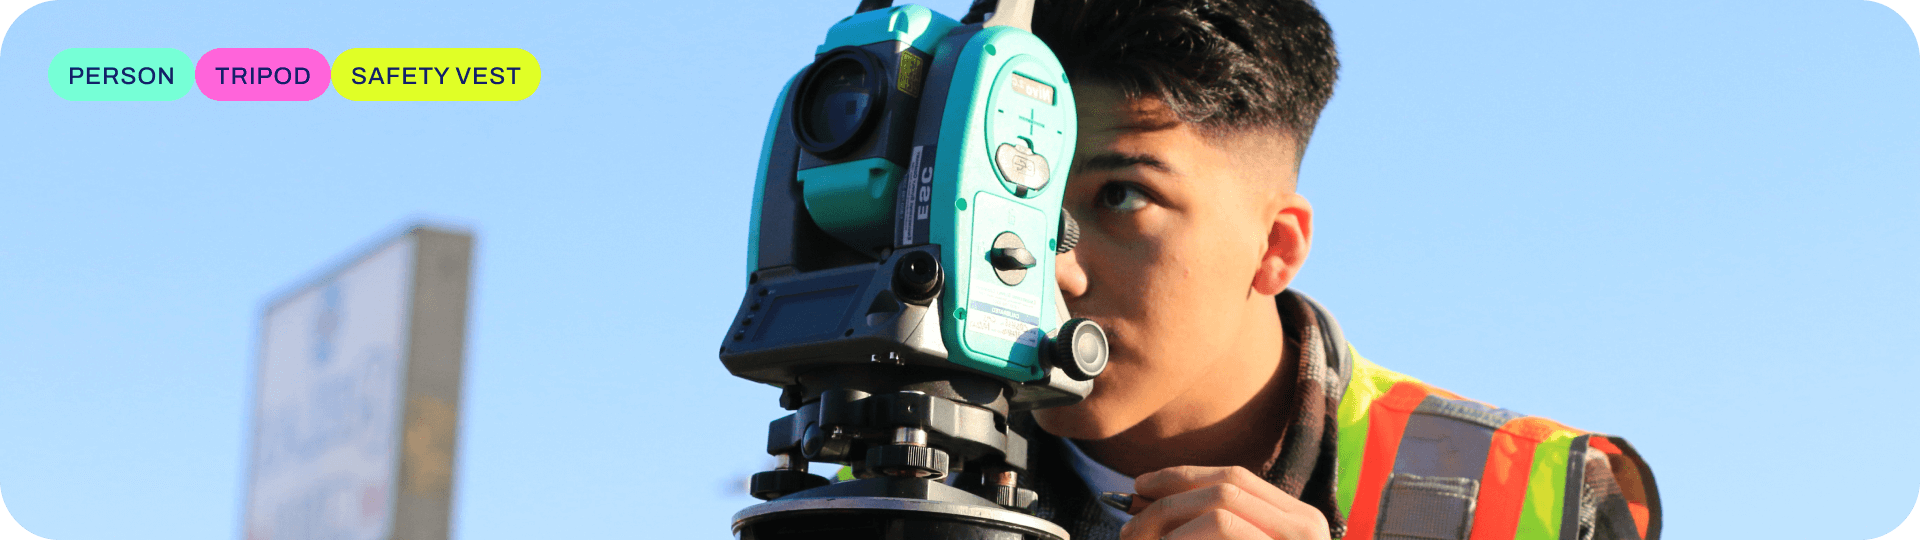
With image classification, you can classify an entire image into a set of predefined classes. The image classifier outputs a class label for an image and a confidence score for that class.

## Object detection
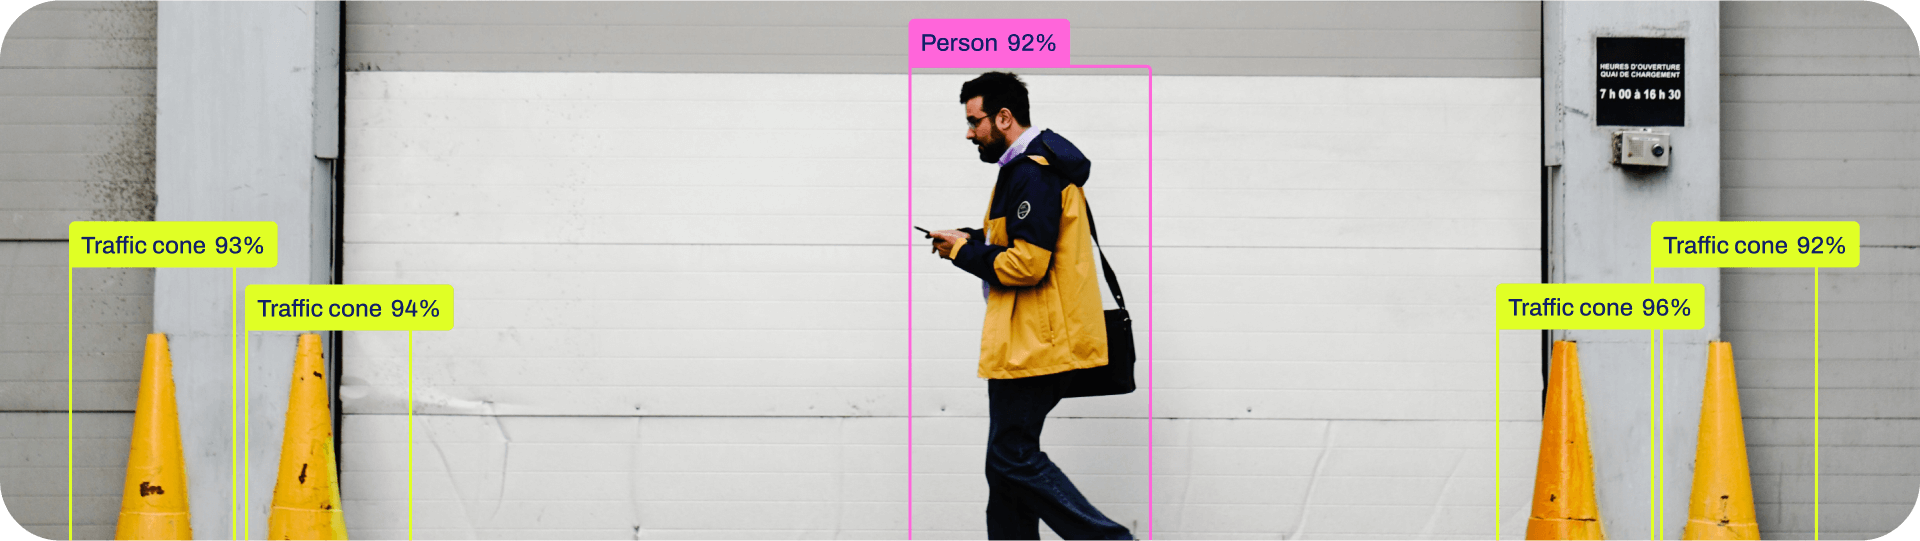
With object detection, you can identify the class and location of objects in an image or video stream. The object detector outputs bounding boxes and class labels for each detected object as well as a confidence score for each detection. This is useful if you need to know where the object is roughly located in the image.

## Instance segmentation
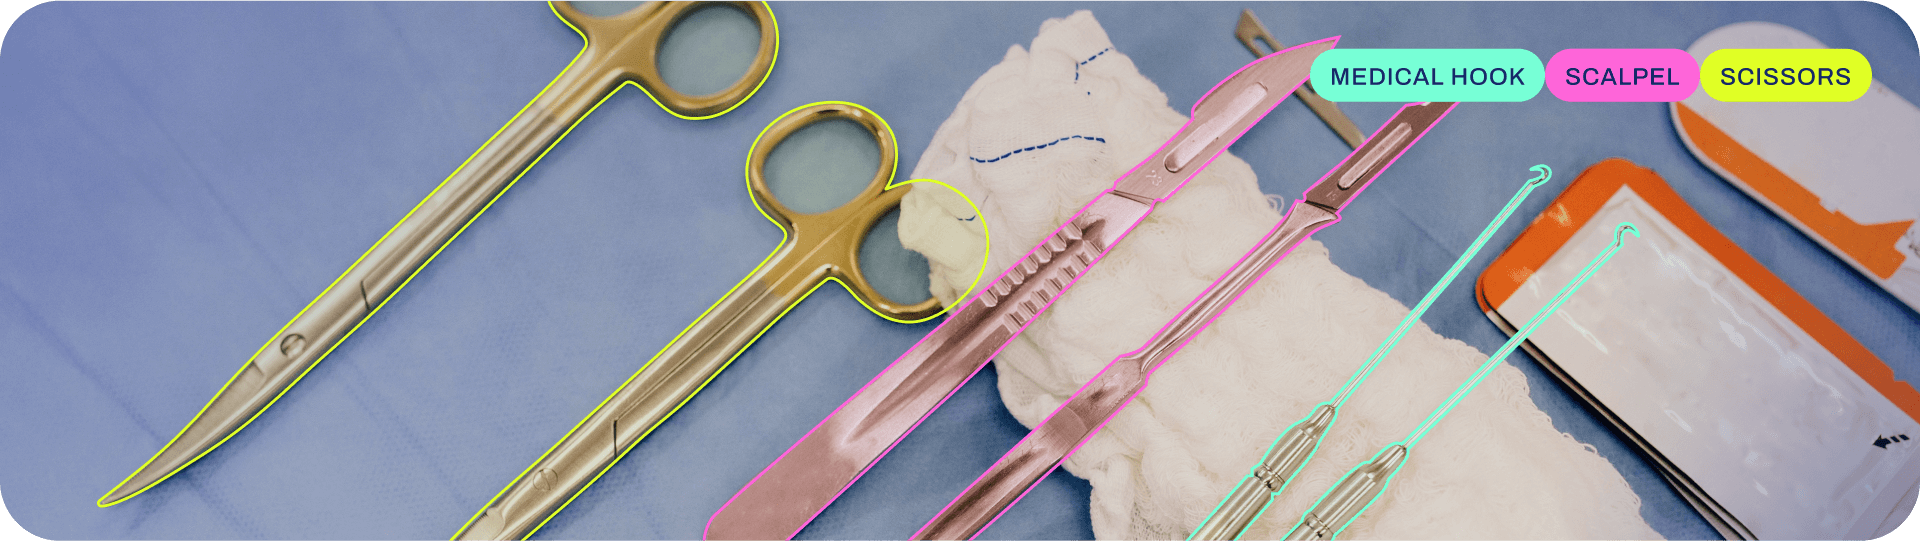
With instance segmentation, you can identify the class and location of an object in an image or video stream and segment it from the background. This is useful if you need to know the exact position and shape of the object.

## Object tracking
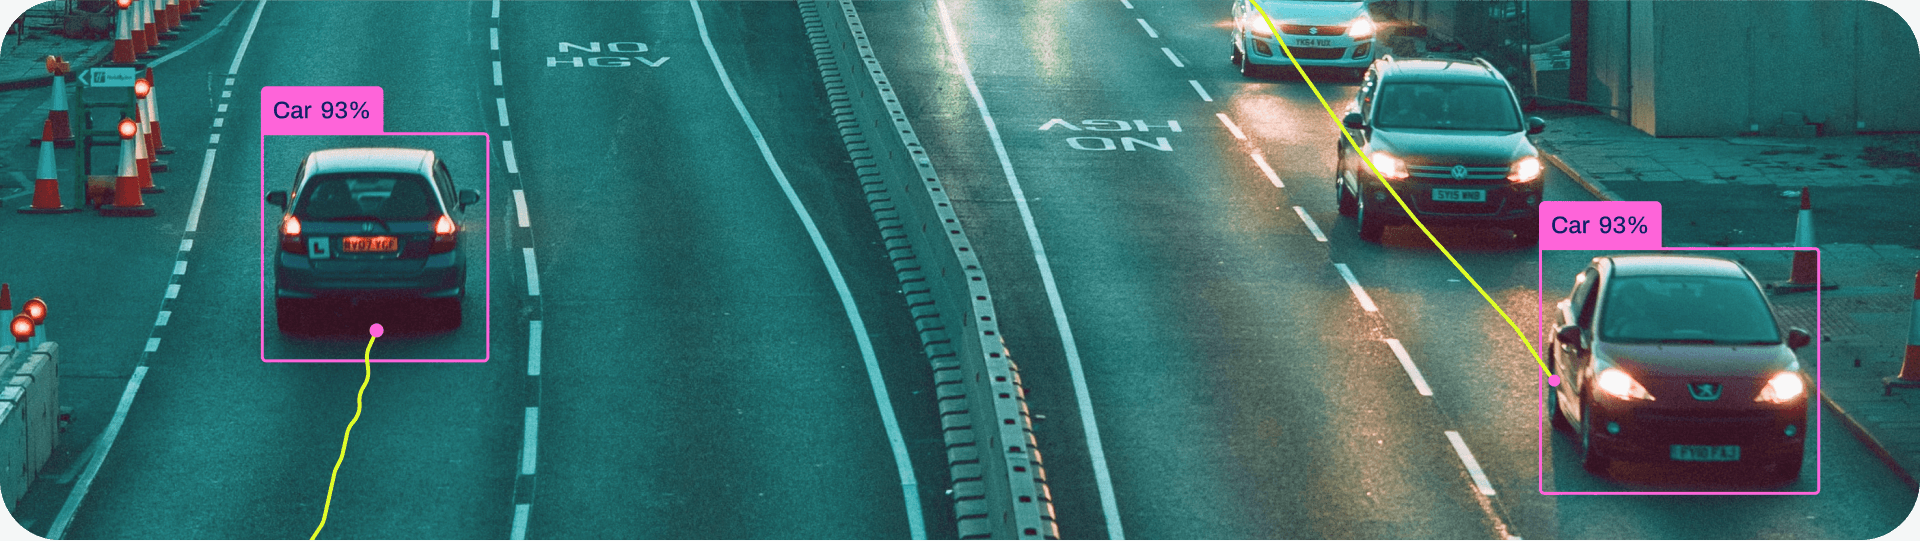
With object tracking, you can track the location of an object in a video stream over time. The object tracker outputs bounding boxes for each frame as well as a unique ID for each object. This is useful if you need to know the trajectory of an object.

## Pose estimation
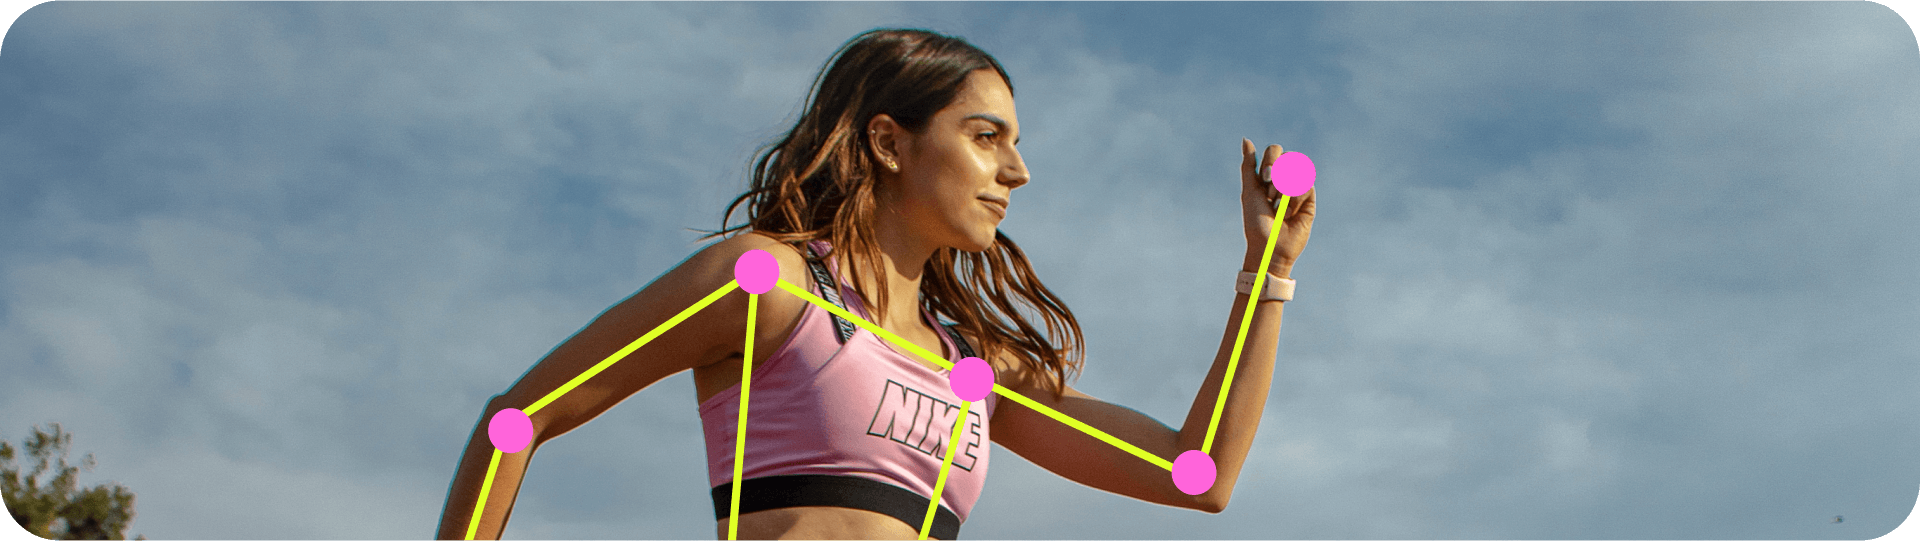
With pose estimation, you can identify the pose of a person in an image or video stream. The pose estimator outputs key points for each person detected as well as a confidence score for each key point. This is useful if you need to know the position of a person's body parts (e.g. eyes, shoulders, hips).


[Source](https://docs.ultralytics.com/models/)

https://raw.githubusercontent.com/ultralytics/assets/main/yolov8/yolo-comparison-plots.png

In [ ]:
from ultralytics import YOLO
import cv2

# Ultralytics is a user-frienly library that provides pretrained models for object detection
# It is open source and free to use, however please note that for commercial usage, a license may be required (however, there are also alternatives available)

# There are different pretrained models available to use
# They have been pretrained on large datasets

# You can choose a model depending on your requirements
# * Object detection
#

# Load a pretrained model
model = YOLO("yolov8n.pt")





## Custom Object Detection 🏔️⛷️
You have been tasked by a ski resort in the Grisons mountain to develop a system that can detect and count skiers in the ski slopes. The system should be able to detect skiers in real-time in order to count the number of skiers on the slopes. The resort wants to use this information to optimize the number of ski lifts running and to improve the overall skier experience. Because of this, we will be training our custom YOLO model.

### Transfer learning
While you could train a model from scratch it is often much more efficient to use an existing model and fine-tune it on your own dataset. This process, which we use here, is called transfer learning. Transfer learning is a machine learning technique where a model trained on one task is re-purposed on a second related task. For example, we will use a pre-trained YOLOv8 model, that is already able to detect and classify objects in images in order to detect a new object, that it hasn't seen before. Transfer learning is widely used, because it uses much less training data, trains much faster and often achieves better performance than training a model from scratch.

### Dataset
In order to train our custom YOLO model, we need a dataset of labeled images with the objects we want to classify. There are many datasets with thousands of images available online, that are already labeled and can be used. Some of them are generic, while others are application specific (e.g. medical imaging, aerial imaging, self-driving cars etc.). Here are two examples of popular datasets:
* https://cocodataset.org/#explore
* https://storage.googleapis.com/openimages/web/index.html

Take a minute to look at the website and see how the images are labelled. For this exercise however, we want to create our own dataset from scratch. Creating your own dataset can be a very tedious process. For our example, there are a lot of images of skiers available online, that we can use. However for other applications, you might need to create your own images.

Synthetic data







However for this exercise, we will be labelling the images ourselves. We start by searching for images of skiers on the internet. We then use a tool to label the images. There are many tools available for labeling images.

Data augmentation

## Training our custom model

In [ ]:
# Load a pretrained model for transfer learning
model = YOLO("yolov8n.pt") 

results = model.train(data="data.yaml", epochs=100)

## Testing the model
Now you can import your newly trained model in order to test it. You can use it just like any other YOLO model.

In [ ]:
# Use newly trained model for inference
model_path = "C:/Users/Noel/Desktop/KI Unterricht/runs/detect/train9/weights/best.pt"
model = YOLO(model_path)

# Test the model on an image
imagename = "SkiZermatt.jpg"
results = model(imagename, show=True)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Test the model on an image
video_url = "https://www.youtube.com/watch?v=wDHMr_qUxNc"
results = model(video_url, stream_buffer=True)

As you can see, the new model performs well on our test image/video and is able to detect our skiers.🥳 Can you test it on some additional images/videos? How does it perform? What are the limitations of the model and how could you improve it?

<details>
    <summary>Click here to hide/unhide the answer!</summary>
  
  ### Answer
  The model performs well on images/videos that are similar to the training data, however if you test it on images/videos that are very different from the training data, the performance is not very good. For example with a video from a ski race from the perspective of a drone/helicopter or with different lighting/weather, the skiers are not reliably recognized. In order to improve the model, its always good to have a diverse dataset with images from different perspectives, lighting conditions, etc. This way the model can generalize better and perform well on unseen data. Large datasets (e.g. the COCO dataset used to train YOLO) can contain tens of thousands of images, which takes a lot of effort. So generally speaking, you have to test the model and see how it performs on your specific use case and then decide if you need more data or not.

  e.g. https://www.youtube.com/watch?v=B5xckyNsWKw
</details>